# GW cosmography with standard sirens
## A mock analysis

In this notebook, we will perform the Bayesian analysis following the paper [The Hitchhiker's guide to the galaxy catalog approach for gravitational wave cosmology](https://arxiv.org/abs/2212.08694). Their approach is implemented here in the [`SimplifiedLikelihood` class](./likelihood.py).

We use the GLADE+ catalog for the redshift information. For the GW data, we make the assumption that the GW signals come from the galaxies within the catalog, and draw (at random) a value of $z$ for a particular galaxy in the catalog with $z < 1.4$, following the methodology in the paper.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import healpy as hp
from catalog.utils import GalaxyCatalog
from inference.likelihood import SimplifiedLikelihood

### Simplification 1: negligible galaxy redshift error

In this section, we compute the posterior probability $p(H_0 | d_{\text{GW}}) \propto p(d_{\text{GW}} | H_0)p(H_0)$ under the assumption that the true galaxy redshifts are known (i.e that we made a perfect measurement). The single event likelihood becomes

\begin{equation}
p(d_i | H_0) = 
\frac{\sum_i^{N_\text{gal}} p(d_i | d_L(\hat{z}^i_\text{gal}, H_0))}{\sum_i^{N_\text{gal}} P^{\text{GW}}_{\text{det}}(\hat{z}^i_\text{gal}, H_0)}
\end{equation}

which corresponds to Eq. (15) of the paper.

We start by loading the catalog:

In [2]:
filename = "./catalog/output.hdf5"
catalog = GalaxyCatalog(filename)

We draw a set of sky directions $\{(\theta_i, \varphi_i)\}$ and we consider circular patches with a $5\degree$ angular radius for each of them, which we consider as the GW localisation area. We select all galaxies within each patch up to $z_\text{max}=1.4$, and we draw $N_{\text{GW}}=10$ events for each of them.

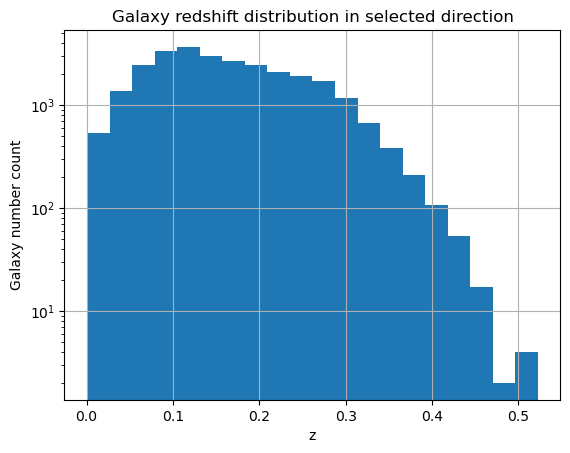

In [8]:
z_max = 1.4
n_gw = 10
angular_radius  = np.radians(5)
n_H0 = 1000

# Draw sky directions
theta = np.random.uniform(0, np.pi / 2)
phi = np.random.uniform(0, 2 * np.pi)
gw_loc_center = hp.ang2vec(theta, phi)

# Get corresponding HEALPIX pixels
ipix_within_gw_loc = hp.query_disc(nside=catalog.nside, vec=gw_loc_center, radius=angular_radius)

# Get corresponding galaxy redshifts
z_gal = catalog.z_at_index(ipix_within_gw_loc)
plt.hist(z_gal, bins=20, log=True)
plt.xlabel('z')
plt.ylabel('Galaxy number count')
plt.title('Galaxy redshift distribution in selected direction')
plt.grid()
plt.show()

Drawing GW events:

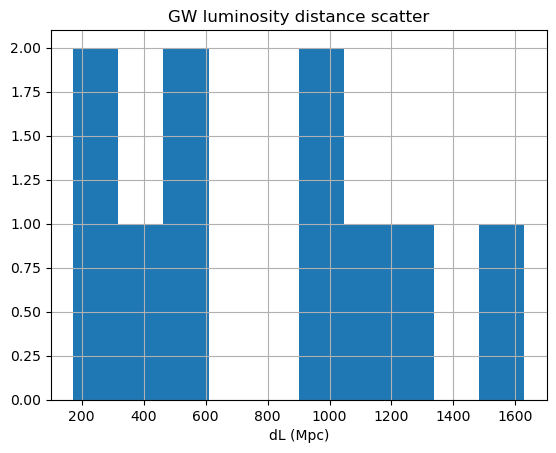

In [12]:

lkh = SimplifiedLikelihood(ignore_z_error=True)
gw_dl_array = lkh.draw_gw_events(z_gal, n_gw)
plt.hist(gw_dl_array)
plt.xlabel('dL (Mpc)')
plt.title('GW luminosity distance scatter')
plt.grid()
plt.show()


Building the likelihood:

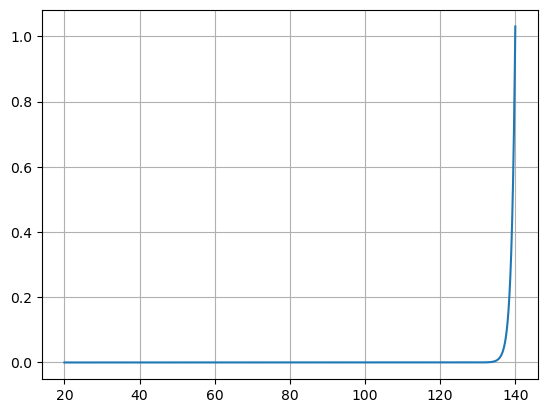

In [13]:
H0_array = np.linspace(20., 140., n_H0)
likelihood, matrix = lkh.likelihood(gw_dl_array, H0_array, z_gal)
plt.plot(H0_array, likelihood)
plt.grid()
plt.show()